In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

In [168]:
# sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

# Chargement du Dataset

In [169]:
data = pd.read_csv('../nba_forecast/data/dataset_complet_X_y.csv')

In [170]:
data.rename(columns={"years": "nb_year_uni", "year": "year_athletic_test"}, inplace=True)

In [171]:
data.columns

Index(['season', 'school_name', 'conf_abbr', 'g', 'gs', 'mp', 'per', 'ts_pct',
       'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm',
       'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan', 'player_id', 'pos', 'off_score',
       'def_score', 'uni_off_score', 'uni_def_score', 'ratio_off',
       'ratio_def'],
      dtype='object')

# Recherche des lignes abérrantes

In [172]:
data.isna().sum()

season                 0
school_name            0
conf_abbr              0
g                      0
gs                     0
mp                     0
per                    0
ts_pct                 0
efg_pct                0
fg3a_per_fga_pct       0
fta_per_fga_pct        0
pprod                  0
orb_pct                0
drb_pct                0
trb_pct                0
ast_pct                0
stl_pct                0
blk_pct                0
tov_pct                0
usg_pct                0
ows                    0
dws                    0
ws                     0
ws_per_40              0
obpm                   0
dbpm                   0
bpm                    0
nb_year_uni            0
year_athletic_test    54
position               0
body_fat_pct          56
hand_length            0
hand_width             0
height_wo_shoes        0
height_w_shoes         0
standing_reach         0
weight                54
wingspan               0
player_id              0
pos                   89


In [173]:
data.isnull().sum()

season                 0
school_name            0
conf_abbr              0
g                      0
gs                     0
mp                     0
per                    0
ts_pct                 0
efg_pct                0
fg3a_per_fga_pct       0
fta_per_fga_pct        0
pprod                  0
orb_pct                0
drb_pct                0
trb_pct                0
ast_pct                0
stl_pct                0
blk_pct                0
tov_pct                0
usg_pct                0
ows                    0
dws                    0
ws                     0
ws_per_40              0
obpm                   0
dbpm                   0
bpm                    0
nb_year_uni            0
year_athletic_test    54
position               0
body_fat_pct          56
hand_length            0
hand_width             0
height_wo_shoes        0
height_w_shoes         0
standing_reach         0
weight                54
wingspan               0
player_id              0
pos                   89


# Constitution du Dataset de train

In [174]:
data_train = data[~data['off_score'].isnull()]

In [175]:
data_train.columns

Index(['season', 'school_name', 'conf_abbr', 'g', 'gs', 'mp', 'per', 'ts_pct',
       'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm',
       'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan', 'player_id', 'pos', 'off_score',
       'def_score', 'uni_off_score', 'uni_def_score', 'ratio_off',
       'ratio_def'],
      dtype='object')

In [176]:
data_train.drop(columns='pos',inplace=True)

/home/borisb/.pyenv/versions/3.8.6/envs/nba_forecast/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Constitution des Dataframes : *X*, *y_off* & *y_def*

In [177]:
X = data_train[['season', 'school_name', 'conf_abbr', 'g', 'gs', 'mp', 'per', 'ts_pct',
       'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm',
       'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan']]

In [178]:
y_off = data_train.pop('ratio_off')

In [179]:
y_def = data_train.pop('ratio_def')

# Optimisation des *dtype*

In [180]:
X.dtypes

season                 object
school_name            object
conf_abbr              object
g                       int64
gs                      int64
mp                      int64
per                   float64
ts_pct                float64
efg_pct               float64
fg3a_per_fga_pct      float64
fta_per_fga_pct       float64
pprod                 float64
orb_pct               float64
drb_pct               float64
trb_pct               float64
ast_pct               float64
stl_pct               float64
blk_pct               float64
tov_pct               float64
usg_pct               float64
ows                   float64
dws                   float64
ws                    float64
ws_per_40             float64
obpm                  float64
dbpm                  float64
bpm                   float64
nb_year_uni             int64
year_athletic_test     object
position               object
body_fat_pct          float64
hand_length             int64
hand_width              int64
height_wo_

In [181]:
X.g = X.g.astype('int32')
X.gs = X.gs.astype('int32')
X.mp = X.mp.astype('int32')
X.nb_year_uni = X.nb_year_uni.astype('int32')
X.hand_length = X.hand_length.astype('int32')
X.hand_width = X.hand_width.astype('int32')
X.height_wo_shoes = X.height_wo_shoes.astype('int32')
X.height_w_shoes = X.height_w_shoes.astype('int32')
X.standing_reach = X.standing_reach.astype('int32')
X.wingspan = X.wingspan.astype('int32')

/home/borisb/.pyenv/versions/3.8.6/envs/nba_forecast/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [182]:
X.dtypes

season                 object
school_name            object
conf_abbr              object
g                       int32
gs                      int32
mp                      int32
per                   float64
ts_pct                float64
efg_pct               float64
fg3a_per_fga_pct      float64
fta_per_fga_pct       float64
pprod                 float64
orb_pct               float64
drb_pct               float64
trb_pct               float64
ast_pct               float64
stl_pct               float64
blk_pct               float64
tov_pct               float64
usg_pct               float64
ows                   float64
dws                   float64
ws                    float64
ws_per_40             float64
obpm                  float64
dbpm                  float64
bpm                   float64
nb_year_uni             int32
year_athletic_test     object
position               object
body_fat_pct          float64
hand_length             int32
hand_width              int32
height_wo_

In [183]:
y_def.dtype

dtype('float64')

In [184]:
y_def.head()

0    0.88
1    0.96
2    0.86
3    0.73
4    0.81
Name: ratio_def, dtype: float64

# Analyse des features

In [185]:
feat_categorical_nunique = X.select_dtypes(include='object').nunique()

In [186]:
feat_categorical_nunique

season                 7
school_name           85
conf_abbr             22
year_athletic_test     7
position               5
dtype: int64

In [187]:
feat_categorical_nunique.sum()

126

<AxesSubplot:>

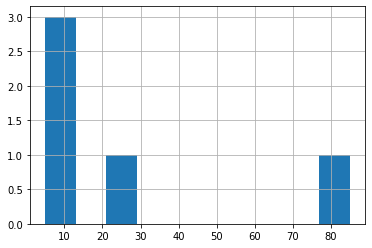

In [188]:
feat_categorical_nunique.hist()

In [189]:
feat_categorical_small = list(feat_categorical_nunique[feat_categorical_nunique < 20].index)

In [190]:
feat_categorical_small

['season', 'year_athletic_test', 'position']

In [191]:
feat_categorical_small_2 = list(feat_categorical_nunique[feat_categorical_nunique < 40].index)

In [192]:
feat_categorical_small_2

['season', 'conf_abbr', 'year_athletic_test', 'position']

In [193]:
feat_categorical_small.pop(0)
feat_categorical_small.pop(0)

'year_athletic_test'

In [194]:
feat_categorical_small

['position']

Nous allons seulement garder la **'position'** comme feat_categorical

# Pipeline de preprocessing - Minimal Baseline

In [195]:
preproc_numerical_baseline = make_pipeline(
    SimpleImputer(verbose=1),
    MinMaxScaler())

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=["int32", "float64"])),
    (preproc_categorical_baseline, feat_categorical_small),
    remainder="drop")

preproc_baseline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(verbose=1)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc15d084be0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['position'])])

In [202]:
shape_preproc_baseline = preproc_baseline.fit_transform(X).shape
shape_preproc_baseline

(245, 38)

## Définition du scorer

In [214]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# This is our metric to minimize
mse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred)**0.5)

# # This is our score to maximize
# rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_log_error(y_true, y_pred)**0.5)
# # Equivalent formulation
# rmsle_neg = make_scorer(
#     lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5,
#     greater_is_better=False
# )

In [215]:
pipe_baseline = make_pipeline(preproc_baseline, Ridge())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(verbose=1)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc15d084be0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position'])])),
                ('ridge', Ridge())])

In [216]:
score_baseline = cross_val_score(pipe_baseline, X, y_def, cv=5, scoring=mse).mean()
score_baseline

0.2515888006567973

In [217]:
score_baseline = cross_val_score(pipe_baseline, X, y_off, cv=5, scoring=mse).mean()
score_baseline

0.13775377049481063